<a href="https://colab.research.google.com/github/Ilektra-Giassa/Tutorials/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exclusive news on 46 topics!

In [64]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#loading the 10K most frequent words
#8982 for train, 2246 for test dataset

In [65]:
max(train_labels)-min(train_labels)
#46 newswire topics

45

### Decode the newswires

In [66]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
#indices 0, 1, 2 for padding, start of sequence, and unknown

### Vectorize the data

In [67]:
import numpy as np
def vectorize(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results

x_train=vectorize(train_data)
x_test=vectorize(test_data)

### OHE of labels

In [122]:
def ohe(labels, dimension=46):
  results=np.zeros((len(labels), dimension))
  for i, labels in enumerate(labels):
    results[i, labels]=1.
  return results

ohe_train_labels=ohe(train_labels)
ohe_test_labels=ohe(test_labels)

### Build the net

In [124]:
from keras import models, layers
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compile model

In [125]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Validation dataset

In [126]:
x_val=x_train[:1000]
y_val=ohe_train_labels[:1000]
x_partial_train=x_train[1000:]
y_partial_train=ohe_train_labels[1000:]

In [127]:
history=model.fit(x_partial_train,
                  y_partial_train, 
                  epochs=20, 
                  batch_size=512, 
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.7684 - accuracy: 0.5212 - val_loss: 1.8670 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.4987 - accuracy: 0.7015 - val_loss: 1.3803 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.1008 - accuracy: 0.7671 - val_loss: 1.1748 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8695 - accuracy: 0.8165 - val_loss: 1.1706 - val_accuracy: 0.7320
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7043 - accuracy: 0.8532 - val_loss: 1.0847 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5692 - accuracy: 0.8834 - val_loss: 0.9748 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4595 - accuracy: 0.9072 - val_loss: 0.9452 - val_accuracy: 0.8050
Epoch 8/20
16

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot loss and accuracy

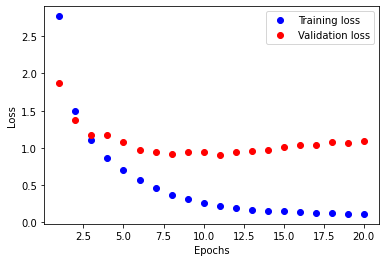

In [129]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

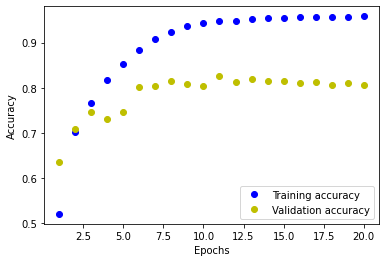

In [130]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'yo', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Retrain the model with 9 epochs; any more and it overfits

In [131]:
model.fit(x_partial_train,
          y_partial_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 0.1117 - accuracy: 0.9574 - val_loss: 1.0819 - val_accuracy: 0.8030
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 0.1116 - accuracy: 0.9565 - val_loss: 1.1261 - val_accuracy: 0.7950
Epoch 3/9
16/16 [==============================] - 1s 52ms/step - loss: 0.1045 - accuracy: 0.9564 - val_loss: 1.1078 - val_accuracy: 0.8040
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.1049 - accuracy: 0.9575 - val_loss: 1.2009 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.1022 - accuracy: 0.9575 - val_loss: 1.1718 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.1052 - accuracy: 0.9583 - val_loss: 1.1413 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 51ms/step - loss: 0.0982 - accuracy: 0.9570 - val_loss: 1.2179 - val_accuracy: 0.7960
Epoch 8/9
16/16 [===

### Evaluate on the test set

In [132]:
results=model.evaluate(x_test, ohe_test_labels)
results

71/71 [==============================] - 0s 4ms/step - loss: 1.3714 - accuracy: 0.7809


[1.3713924884796143, 0.7809438705444336]

### Generate predicitons

In [133]:
predictions=model.predict(x_test)
predictions
predictions[0].shape

(46,)

In [135]:
np.argmax(predictions[0])

3